#Mounting Drive and changing directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Deloitte/K-means

/content/drive/MyDrive/Deloitte/K-means


#Importing Required Libraries

In [ ]:
import numpy as np
import warnings
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from scipy.spatial.distance import cdist
import os
import pandas as pd
import time

#Orignial Image

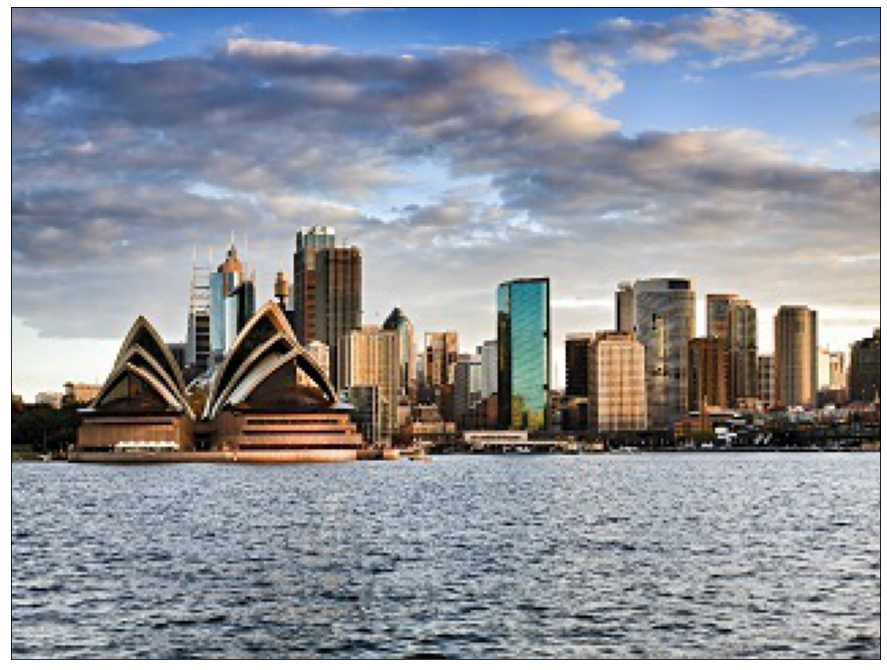

In [ ]:
orignal_name="sydney.jpg"
plt.rcParams['figure.figsize'] = (20, 12)
image = io.imread(orignal_name)
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);

**Image size**

In [ ]:
orignal_stat = os.stat(orignal_name)
print("Size of the image =",orignal_stat.st_size/1000,"K")

Size of the image = 43.532 K


# Reshaping the data

In [ ]:
image = io.imread(orignal_name)
print("Current shape-",np.shape(image))
rows = image.shape[0]
cols = image.shape[1]
image = image.reshape(rows*cols, 3)
print("Shape after transformation-",np.shape(image))

Current shape- (240, 320, 3)
Shape after transformation- (76800, 3)


# **Kmean Class**

1) The class contains following variables:-
    

*    Centroids  (list of centroids formed)
*   n_cluster=Number of cluster required




2) The class contains following functions:-
*   fit
*   Evaluate


In [ ]:
class KMeans_coded:
    def __init__(self, n_clusters=8, max_iter=20):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):

        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid

        X_train=X_train/255
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
          distance=cdist(X_train,self.centroids)
          centroid_allocated=[np.min(i) for i in distance]
          next_centroid=X_train[np.argmax(centroid_allocated)]
          self.centroids.append(next_centroid)
      #    print("No of centroid found ",_+2)

        iteration = 0
        prev_centroids = [random.choice(X_train)]

        while np.not_equal(np.round(self.centroids,5),np.round(prev_centroids,5)).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid

            sorted_points = [[] for _ in range(self.n_clusters)]
            
            
            dist=cdist(X_train,self.centroids)
            a=[np.argmin(i) for i in dist]
            new_centroids=[]
            z=np.array(a)
            for i in range(self.n_clusters):
              count=np.where(z==i)[0]
              new_centroids.append(np.mean(X_train[count],axis=0) )

            prev_centroids=self.centroids
            self.centroids=new_centroids
            iteration += 1



    def evaluate(self, X):
      centroid_idxs = []
      X=X/255
      dist=cdist(X,self.centroids)
      #print(np.shape(dist))
      centroid_idxs=[np.argmin(i) for i in dist]
      inertia=np.sum(np.min(i) for i in dist)
      center=[255*self.centroids[i] for i in centroid_idxs]
      return center, centroid_idxs, inertia




# **Example with 64 clusters**

**Creating the object and fitting the data**

In [ ]:
centers=64
km = KMeans_coded(n_clusters=centers, max_iter=200)                         #initializing the object
km.fit(image)                                                               #Fitting the data
class_centers, classification,inertia = km.evaluate(image)                  #Evaluating the data by getting inertia, 
compressed_image = np.clip(np.array(class_centers).astype('uint8'), 0, 255) #Handling Returned values
compressed_image=compressed_image.reshape(rows,cols,3)                      #Reshaping for plotting the image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


**Evaluating the size, inertia and showing the image**


Size of the image= 22.474K
Inertia after clustering= 2851.68




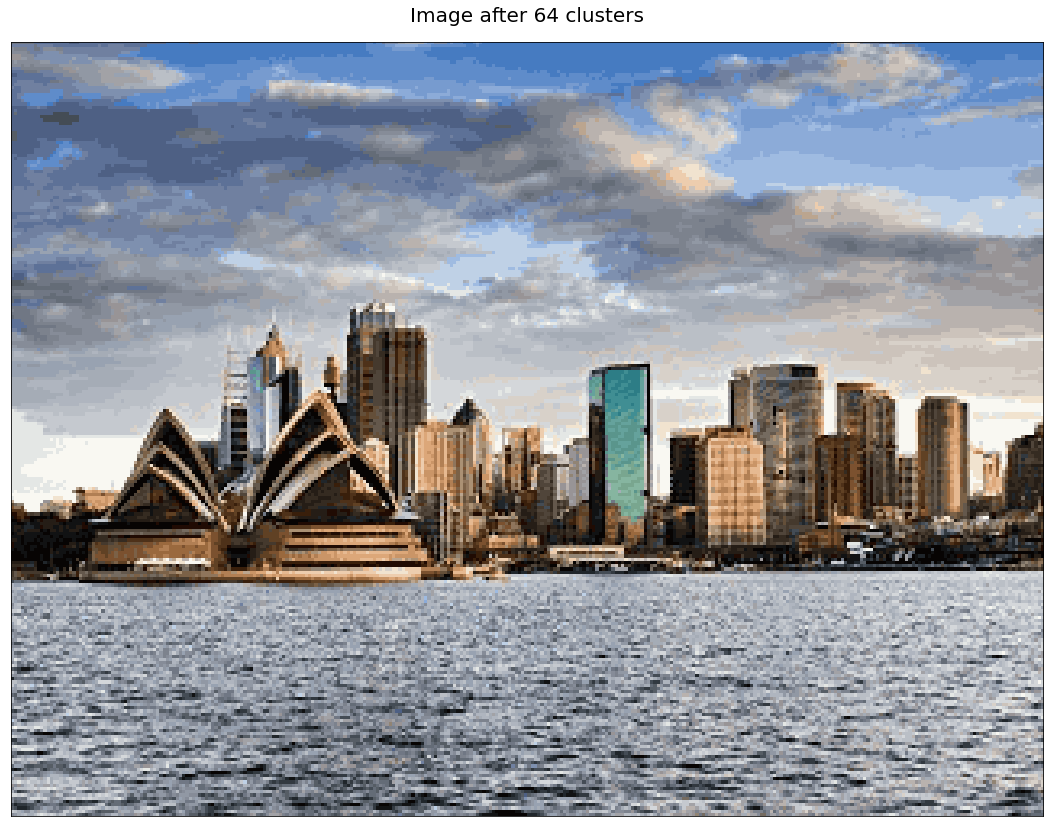

In [ ]:
image_name=str(centers)+".jpg"                                              #Name of the image                                                         
io.imsave(image_name, compressed_image)                                     #Saving the image
file_stat = os.stat(image_name)                                             #Stats of the image
print("\nSize of the image= {}K".format(file_stat.st_size/1000))            #Printing the size of the image
print("Inertia after clustering= {}".format(np.round(inertia,3)))           #Inertia of the image
print("\n")
plt.figure(figsize=([15,15]))
plt.title("Image after 64 clusters",fontsize=20,pad=20)
io.imshow(compressed_image)                                                 #Showing the image
plt.xticks([])
plt.yticks([])
io.show()

#**Comparing Cluster Outputs**

1) Running clusters from range- [ 2  ,3  ,6, 12,  22,  30,  50 ]



2) Storing the following values for each cluster :-


*   Time taken for compression
*   Size of the image
*   Inertia after clustering




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


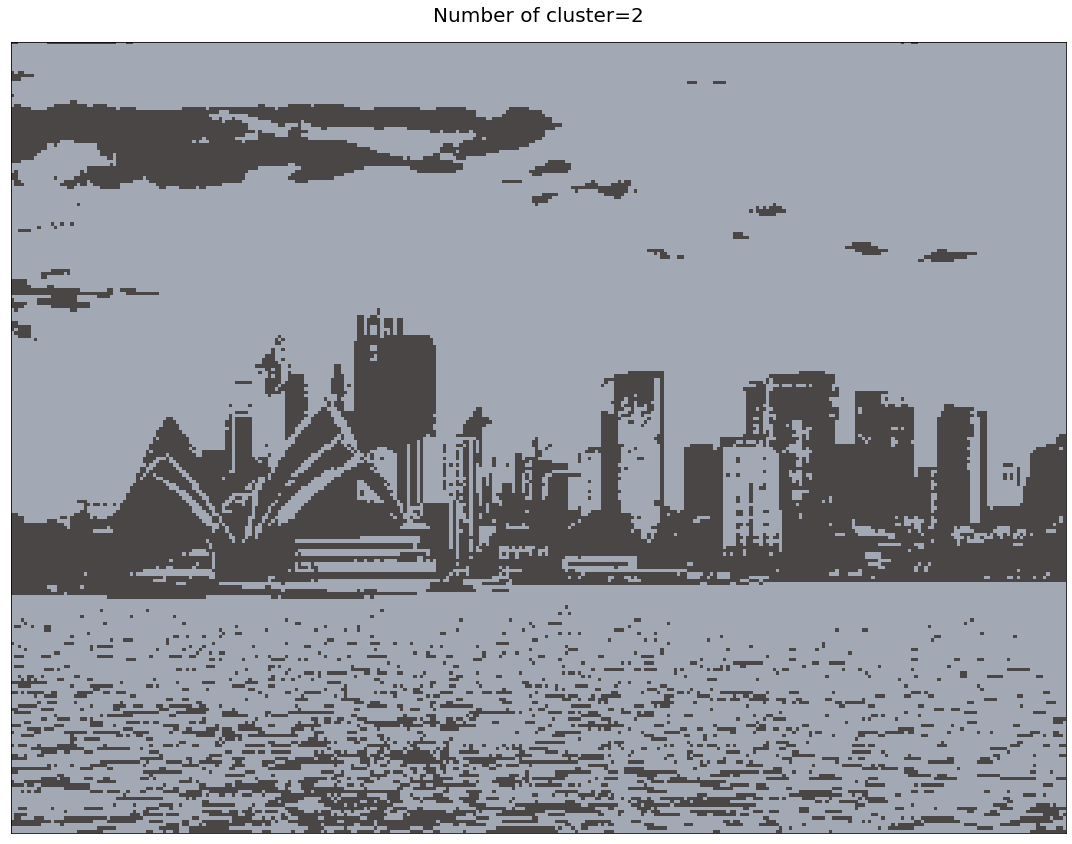

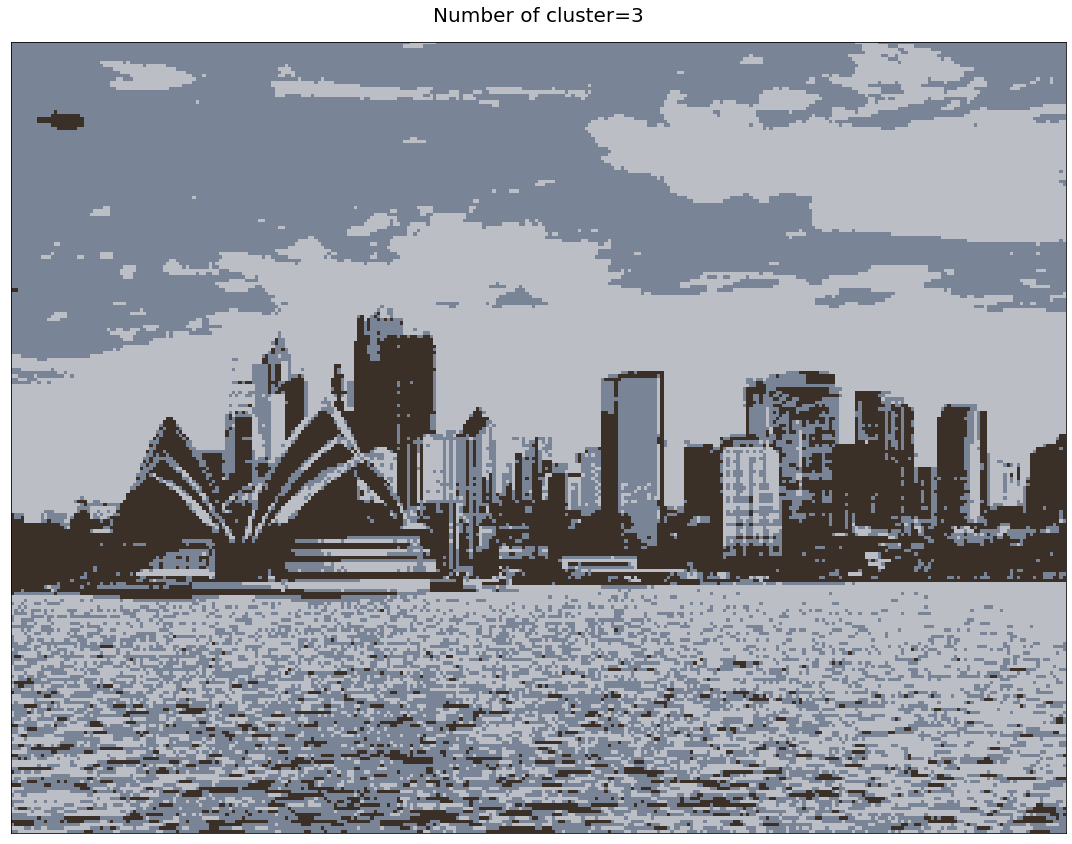

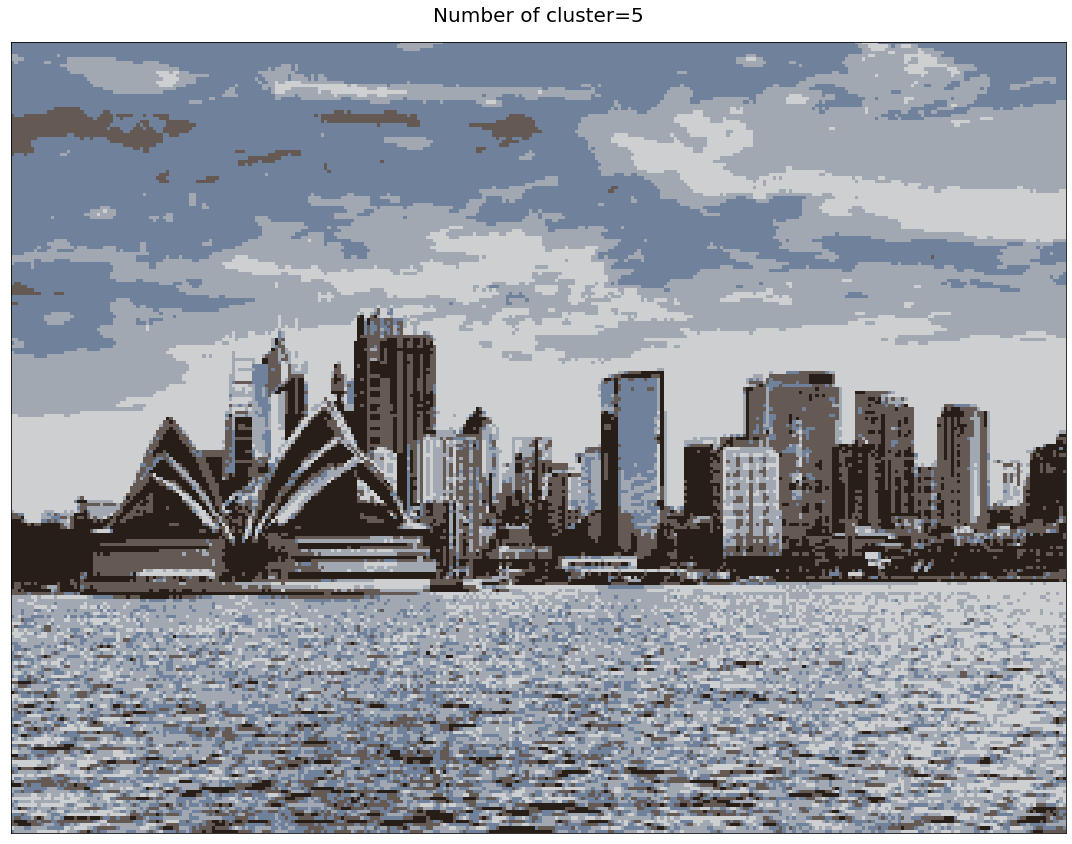

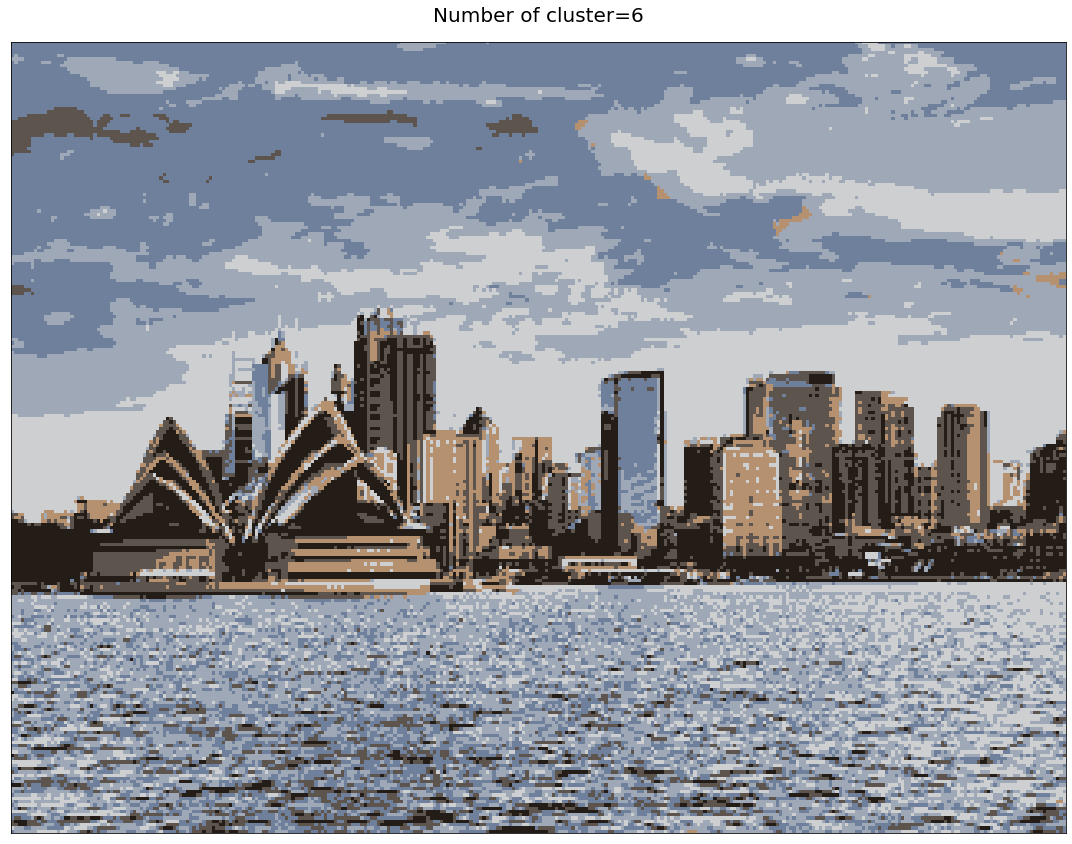

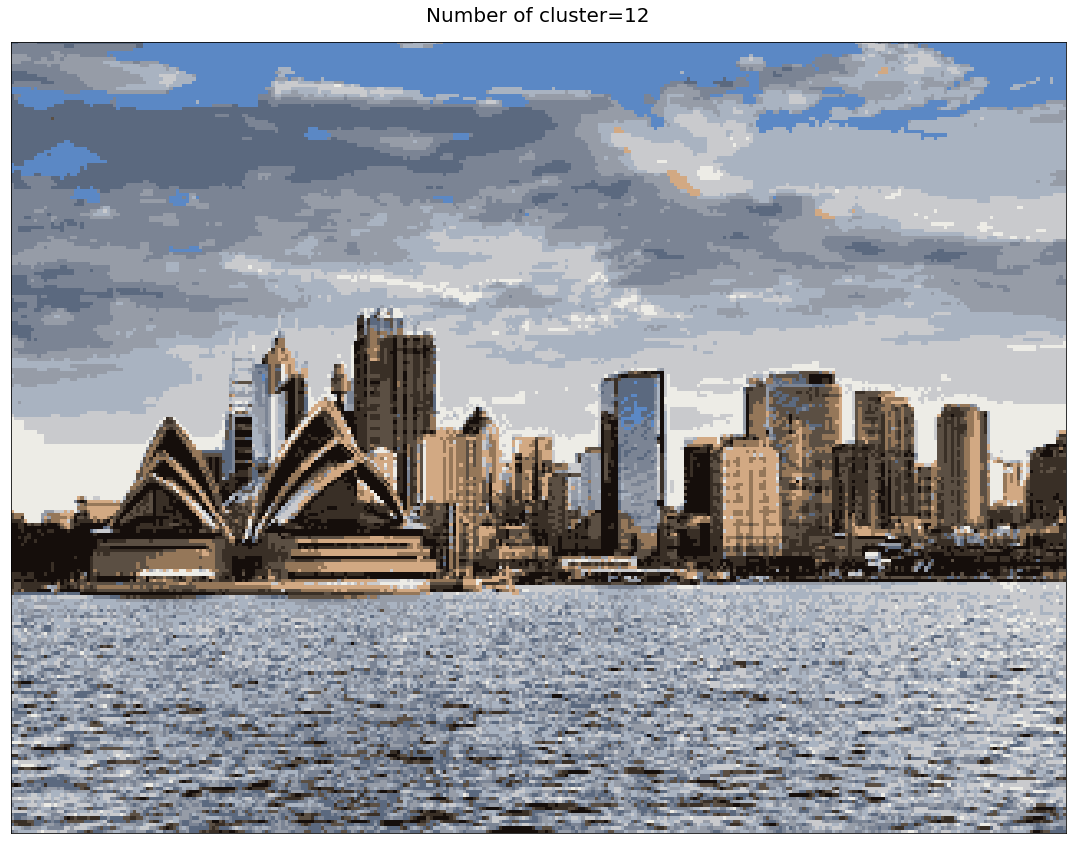

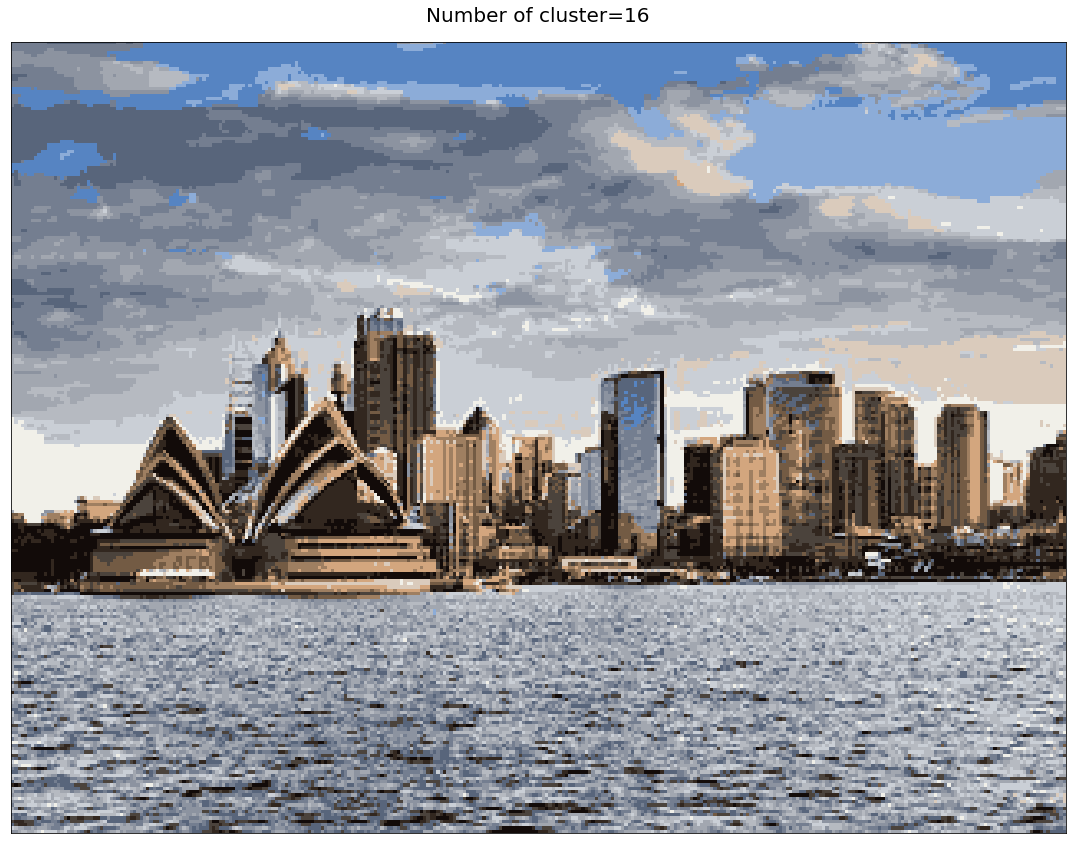

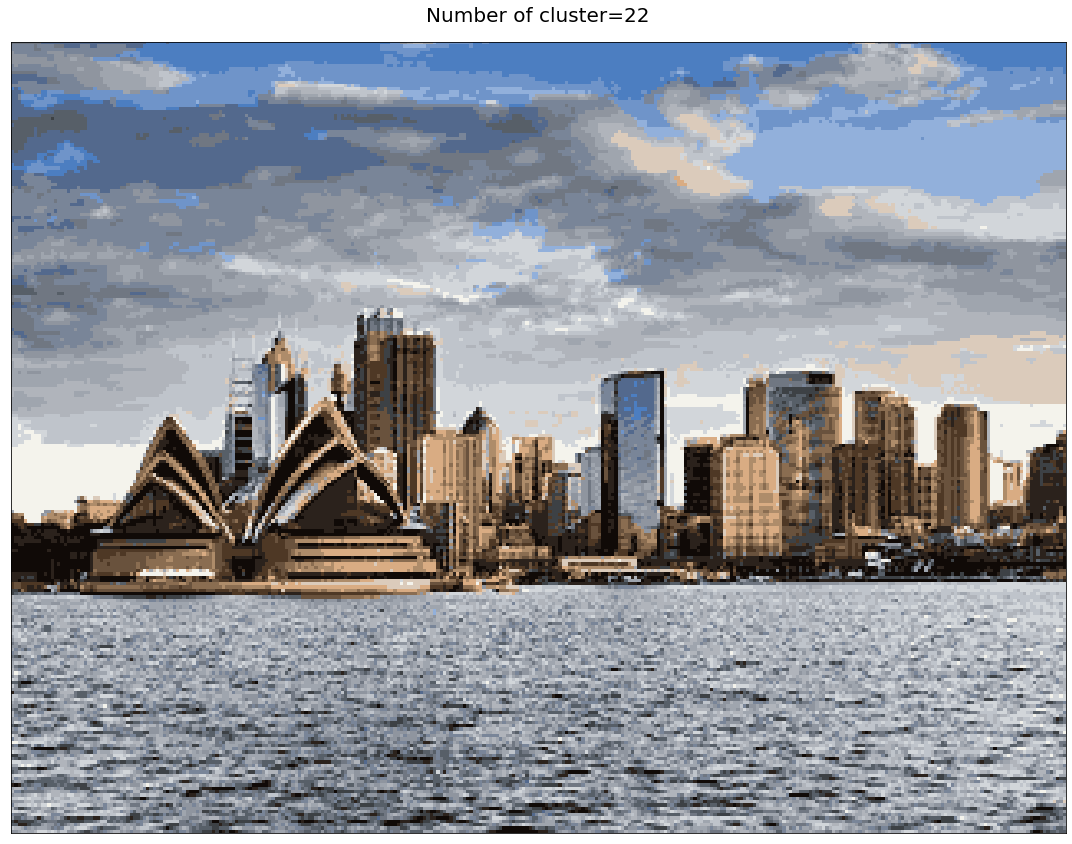

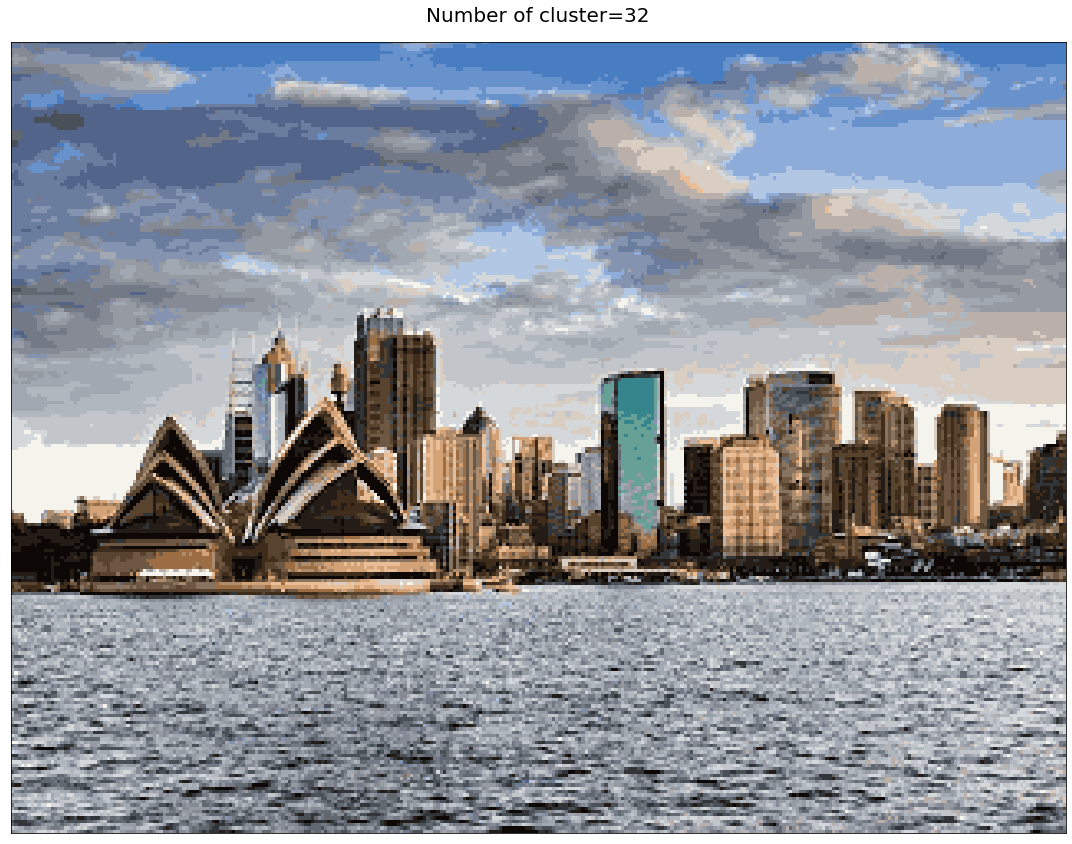

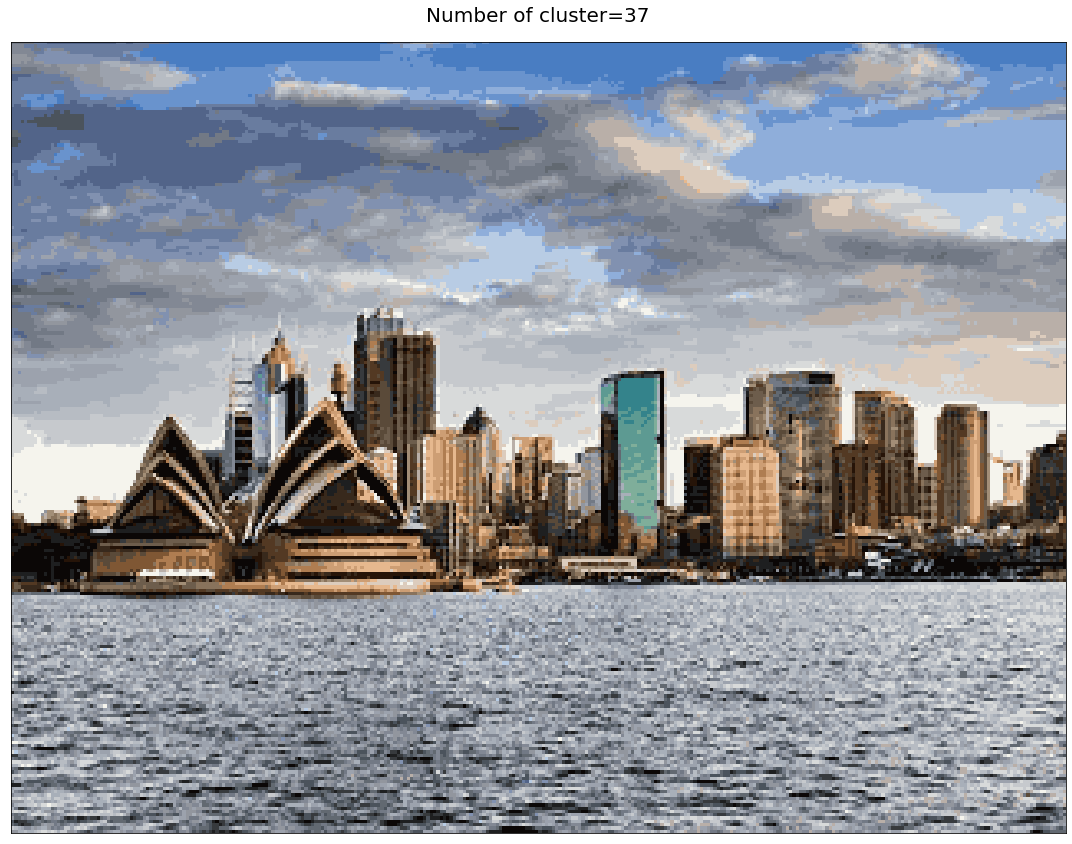

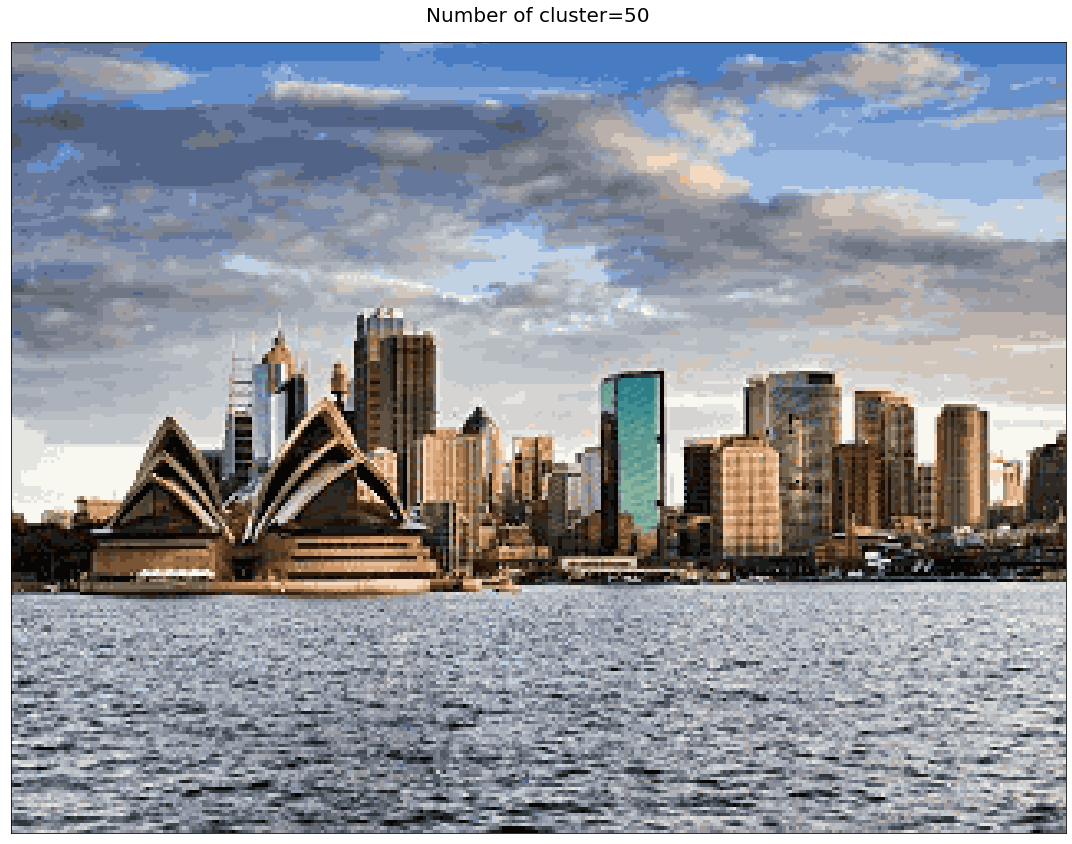

In [ ]:
cluster_experiment=[2,3,5,6,12,16,22,32,37,50]
time_list=[]
cluster_list=[]
inertia_list=[]
size_list=[]

for i in cluster_experiment:
  start_time=time.time()
  centers=i
  km = KMeans_coded(n_clusters=centers, max_iter=200)  
  km.fit(image)
  class_centers, classification,inertia = km.evaluate(image)
  time_list.append(time.time()-start_time)
  inertia_list.append(inertia)
  cluster_list.append(centers)

  compressed_image = np.clip(np.array(class_centers).astype('uint8'), 0, 255)
  compressed_image=compressed_image.reshape(rows,cols,3)
  image_name=str(centers)+".jpg"
  io.imsave(image_name, compressed_image)
  file_stat = os.stat(image_name)
  size_list.append(file_stat.st_size/10000)
  plt.figure(figsize=([15,15]))
  plt.title(("Number of cluster="+str(centers)), fontsize=20,pad=20)
  plt.xticks([])
  plt.yticks([])
  io.imshow(compressed_image)
  io.show()
  


**Storing the data**

In [ ]:
data=pd.DataFrame()
data["Time"]=time_list
data["Inertia"]=inertia_list
data["Cluster"]=cluster_list
data["size"]=np.array(size_list)
data.to_csv("Statistics.csv",index=False)

# **Visualizing the data**

#**Inertia vs No of cluster**

Text(0, 0.5, 'Inertia')

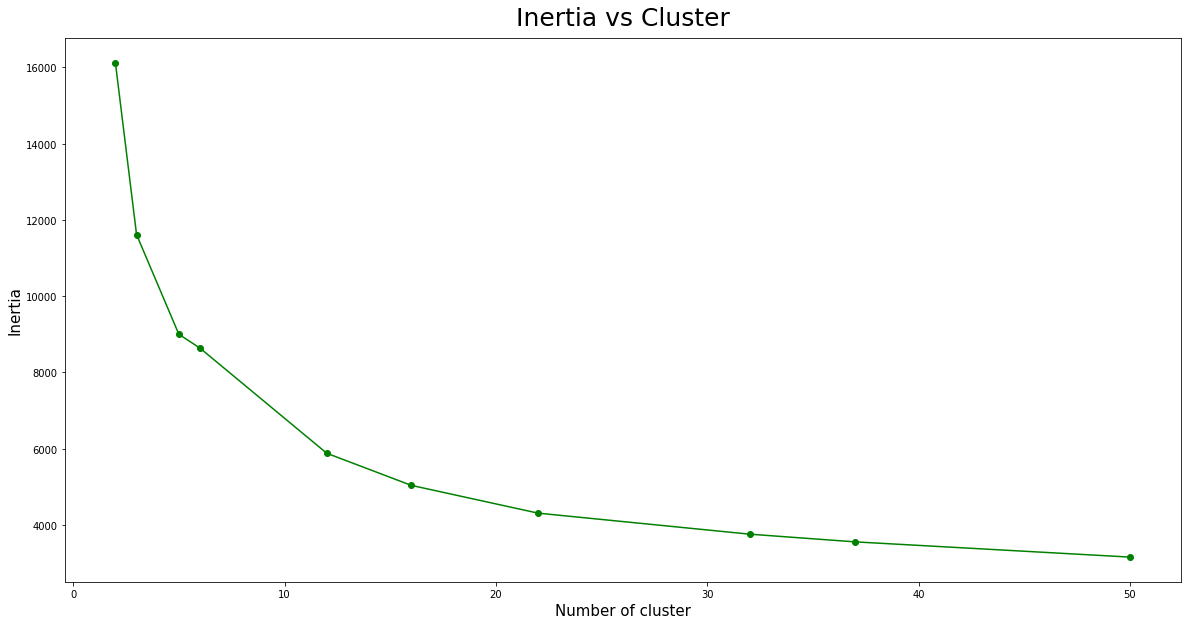

In [ ]:
warnings.filterwarnings("ignore")
plt.figure(figsize=[20,10])
plt.title("Inertia vs Cluster",fontsize=25,pad=13)
plt.plot(data["Cluster"],data["Inertia"], "-o",color="green")
plt.xlabel("Number of cluster",fontsize=15)
plt.ylabel("Inertia",fontsize=15)


# **Time taken vs No of cluster**

Text(0, 0.5, 'Time (seconds)')

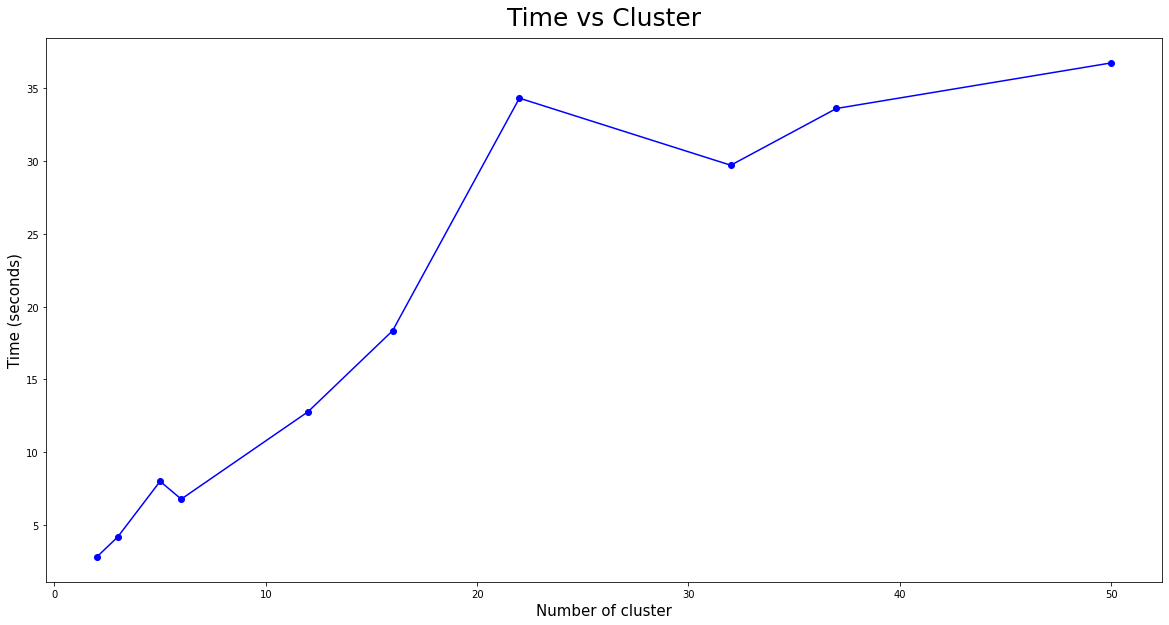

In [ ]:
plt.figure(figsize=[20,10])
plt.title("Time vs Cluster",fontsize=25,pad=13)
plt.plot(data["Cluster"],data["Time"], "-o",color="blue")
plt.xlabel("Number of cluster",fontsize=15)
plt.ylabel("Time (seconds)",fontsize=15)

# **Size vs No of cluster**

Text(0, 0.5, 'Size')

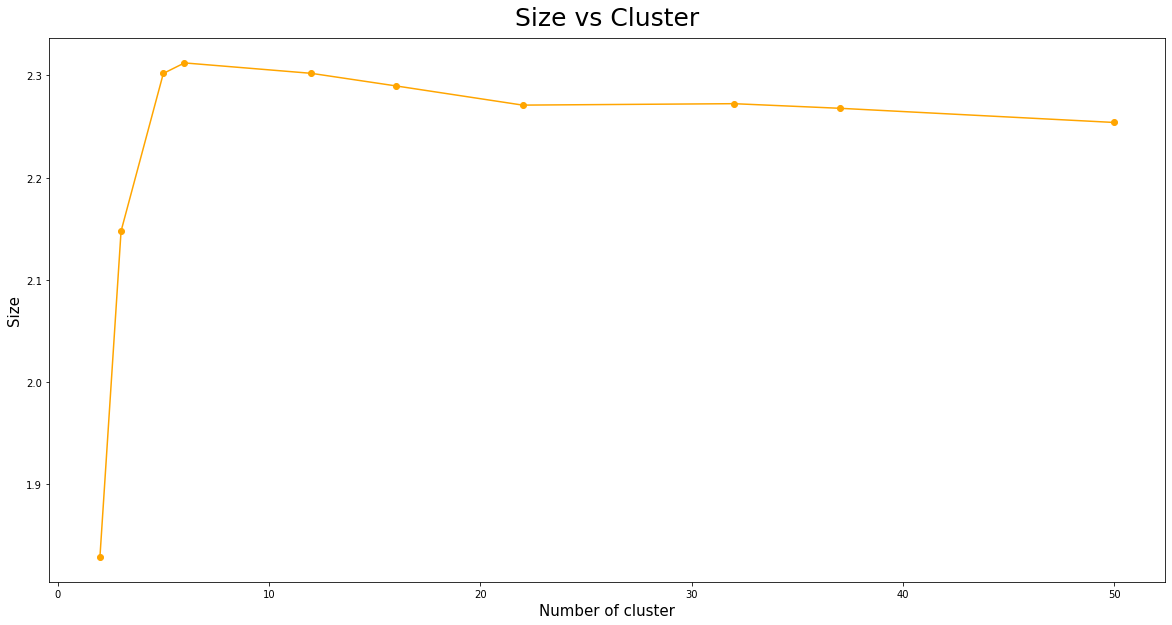

In [ ]:
plt.figure(figsize=[20,10])
plt.title("Size vs Cluster",fontsize=25,pad=13)
plt.plot(data["Cluster"],data["size"], "-o",color="orange")
plt.xlabel("Number of cluster",fontsize=15)
plt.ylabel("Size",fontsize=15)

#Finding optimal cluster value

In [ ]:
!pip install Kneed

In [ ]:
from kneed import KneeLocator
cost_knee = KneeLocator(
        x=data["Cluster"], 
        y=data["Inertia"], 
        S=0.1, curve="convex", direction="decreasing", online=True)

In [ ]:
print("Best No of cluster=",cost_knee.elbow)
print("Inertia at",cost_knee.elbow,"Cluster=",np.array(data[data["Cluster"].isin([12])])[0][1])

Best No of cluster= 12
Inertia at 12 Cluster= 5878.945664334148


# Best cluster Statistics

In [ ]:
data[data["Cluster"].isin([12])]

,Time,Inertia,Cluster,size
4,12.76751,5878.945664,12,2.302
